In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv("winequality-red.csv")

In [2]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

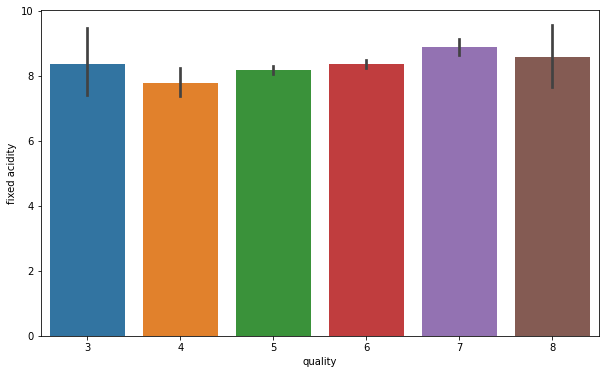

In [4]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

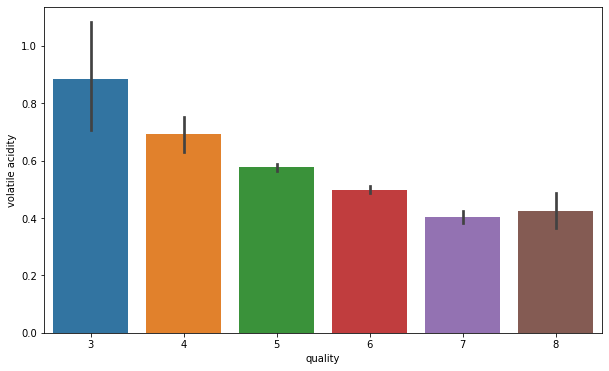

In [5]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

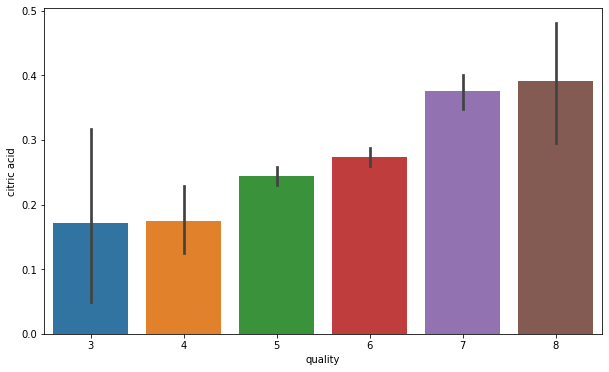

In [6]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

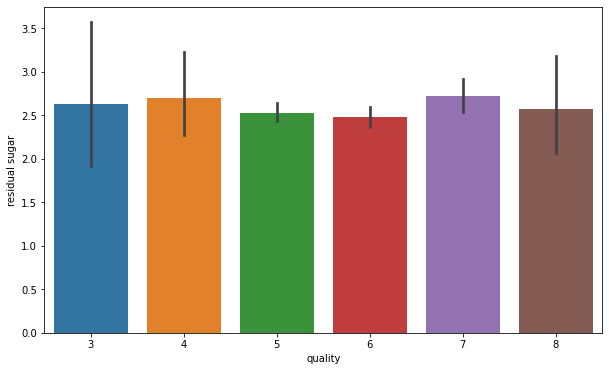

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

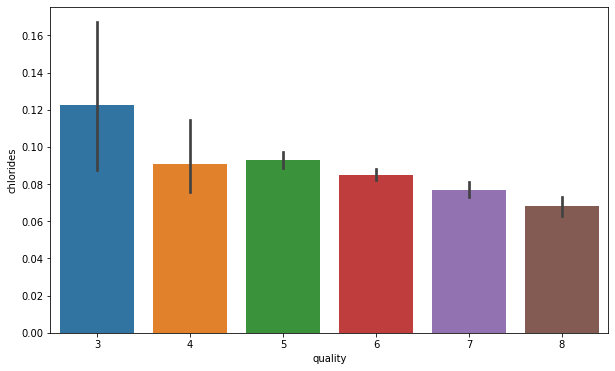

In [8]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

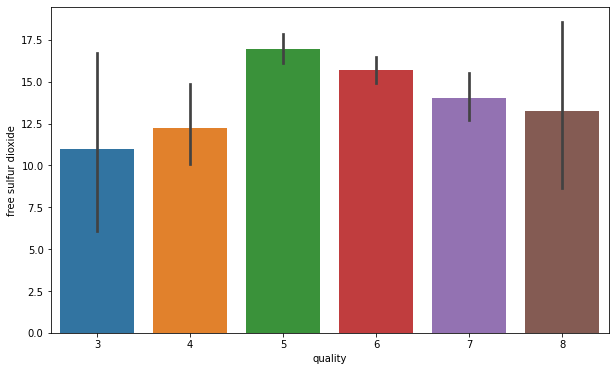

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

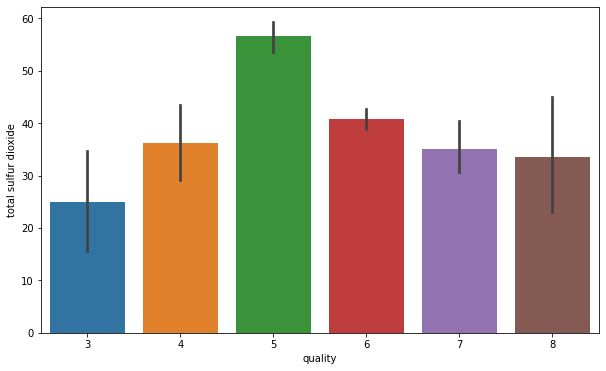

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

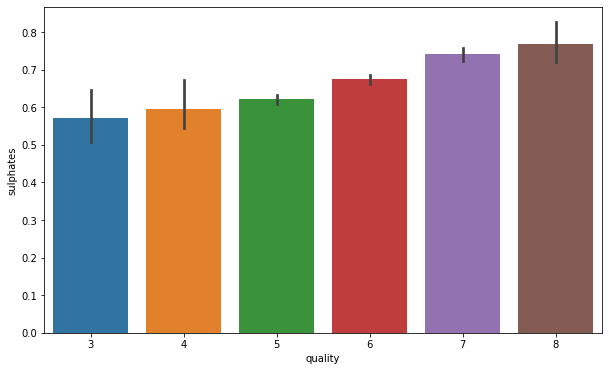

In [11]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

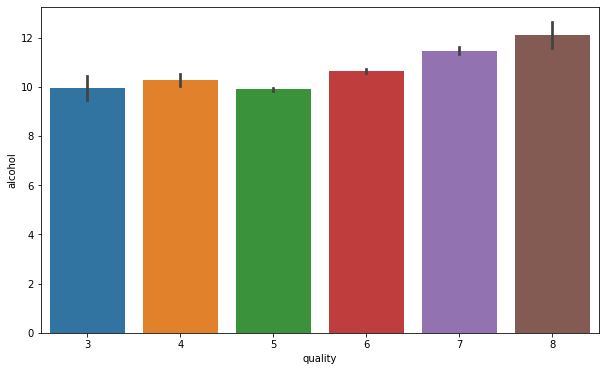

In [12]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = dataset)

In [13]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)

In [14]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [15]:
#Bad becomes 0 and good becomes 1 
dataset['quality'] = label_quality.fit_transform(dataset['quality'])

In [16]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

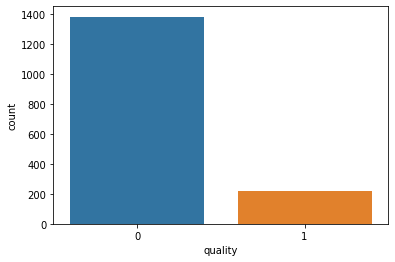

In [17]:
sns.countplot(dataset['quality'])

In [18]:
#Now seperate the dataset as response variable and feature variabes
X = dataset.drop('quality', axis = 1)
y = dataset['quality']

In [19]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Logistic Regression

In [22]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

In [23]:
print(confusion_matrix(y_test, pred_lr))

[[268   5]
 [ 35  12]]


In [24]:
accuracy =lr.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 87.5 %


#### Random Forest classifier

In [25]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [26]:
print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 30  17]]


In [27]:
accuracy =rfc.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 88.125 %


#### Support Vector Classifier

In [28]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [29]:
print(confusion_matrix(y_test, pred_svc))

[[268   5]
 [ 35  12]]


In [30]:
accuracy =svc.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 87.5 %


#### KNN Classifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [32]:
print(confusion_matrix(y_test, pred_knn))

[[261  12]
 [ 28  19]]


In [33]:
accuracy =knn.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 87.5 %


#### Naive Bayes

In [34]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

In [35]:
print(confusion_matrix(y_test, pred_nb))

[[238  35]
 [ 12  35]]


In [36]:
accuracy =nb.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 85.3125 %


### Conclusion

Random Forest Classifier gives the best results.